In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('auto-mpg.csv')
data.shape

(392, 9)

In [4]:
data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Very important to see how the correlation is perfectly represented visually

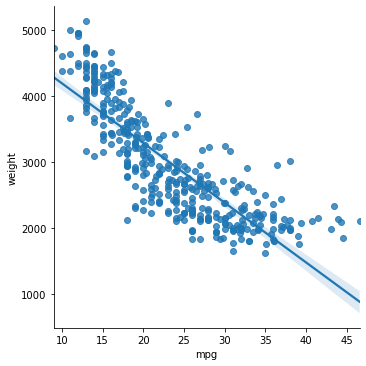

-0.8322442148315753

In [5]:
sns.lmplot(x = 'mpg', y = 'weight', data = data)
plt.show()
data['mpg'].corr(data['weight'])

### Important function to change the cathegorical values!

In [6]:
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [7]:
data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


### TO BUILD ANY MODEL ALL DATA MUST BE EITHER INT OR FLOAT!!

## NEW FUNCTION! The pd.get_dummies(df,columns = ['birdy']) function is used for cathegorical columns in a database and makes a separate column for each cathegorical value!

In [8]:
data = pd.get_dummies(data, columns = ['origin'])
data

,mpg,cyl,displ,hp,weight,accel,yr,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [9]:
data.shape

(392, 11)

### We use .dtypes to check if all columns are int or float.If one column is object then we have a problem and we must adress it!

In [10]:
data.dtypes

mpg               float64
cyl                 int64
displ             float64
hp                  int64
weight              int64
accel             float64
yr                  int64
name               object
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [11]:
data.head()

,mpg,cyl,displ,hp,weight,accel,yr,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


In [13]:
data.drop('name', axis = 1)

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,0,0


# INVALUABLE!!!

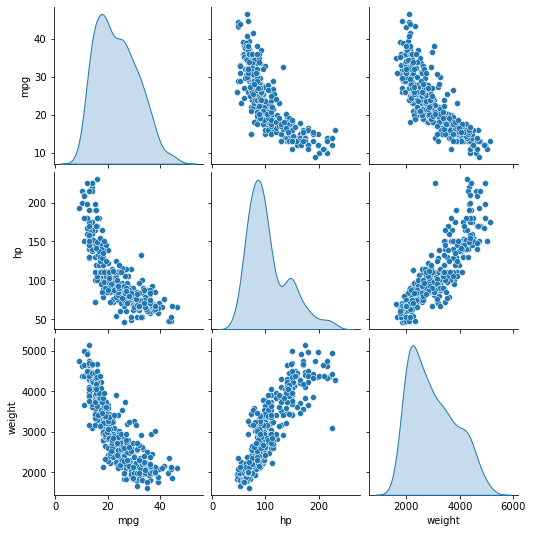

In [15]:
features = data.loc[:,['mpg','hp','weight']]
sns.pairplot(features, diag_kind = 'kde')

In [26]:
data.drop('name',axis = 1,inplace = True)
data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


### We start building our model

In [27]:
#independent variables
X = data.drop('mpg', axis = 1)
#dependent variable
y = data[['mpg']]

In [28]:
#Splitting the data into train,test and split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1) #<- if random_state = 1,everytime we run the code,the same variables will be selected!


In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

### The model will respect this function: y = m1x1 + m2x2 + m3x3 + ... + mixi + c
### where m1,m2,...mi are the coefficients and c is the intercept!

## The .coef_ function is really helpful to see the coefficient of every feature and how it impacts y!!!

In [33]:
regression_model.coef_[0]

array([-2.32509254e-01,  2.45825956e-02, -1.48890324e-03, -7.61188242e-03,
        2.80132661e-01,  7.74684971e-01, -1.77314559e+00,  9.47250347e-01,
        8.25895242e-01])

In [32]:
for index,col_names in enumerate(X_train.columns):   #<- enumerate is a function that gives an index to each value of X_train.columns so that s why we got 2 variables for this for loop!!
    print('Coefficient of {} is {}'.format(col_names,regression_model.coef_[0][index]))

Coefficient of cyl is -0.23250925374175377
Coefficient of displ is 0.024582595649820998
Coefficient of hp is -0.001488903236773842
Coefficient of weight is -0.0076118824242904564
Coefficient of accel is 0.2801326608622863
Coefficient of yr is 0.7746849712944145
Coefficient of origin_america is -1.7731455887480643
Coefficient of origin_asia is 0.9472503470709662
Coefficient of origin_europe is 0.8258952416770982


## Similarly, the .intercept_ function gives us the value of "c".

In [37]:
intercept = regression_model.intercept_[0]
print("The intercept of the function is {}".format(intercept))

The intercept of the function is -19.750891123310257


## Now we calculate the score(R^2) of the in-sample(training) data and the out of sample(testing) data:

In [40]:
regression_model.score(X_train,y_train)  # <- 0.8205
regression_model.score(X_test,y_test)  # <- 0.8242 not bad!

0.8242172817490033

In [41]:
X_test

,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
81,4,120.0,97,2506,14.5,72,0,1,0
165,4,97.0,75,2171,16.0,75,0,1,0
351,4,108.0,75,2350,16.8,81,0,1,0
119,4,121.0,112,2868,15.5,73,0,0,1
379,4,91.0,67,1995,16.2,82,0,1,0
...,...,...,...,...,...,...,...,...,...
59,4,140.0,90,2408,19.5,72,1,0,0
12,8,400.0,150,3761,9.5,70,1,0,0
303,4,151.0,90,2670,16.0,79,1,0,0
163,8,262.0,110,3221,13.5,75,1,0,0


In [43]:
regression_model.predict(X_test)

array([[23.83567423],
       [28.59726492],
       [32.37736248],
       [22.01588437],
       [35.28019321],
       [28.14163774],
       [26.55945716],
       [12.57219984],
       [25.63744107],
       [32.0953011 ],
       [23.40186073],
       [32.21377673],
       [20.20455071],
       [31.80347979],
       [29.52579591],
       [14.74734514],
       [29.86523971],
       [33.12612966],
       [11.05583483],
       [23.03764967],
       [27.03713766],
       [17.98215689],
       [17.970493  ],
       [16.10744901],
       [10.85311295],
       [20.09330878],
       [31.84106862],
       [18.50652465],
       [21.76656008],
       [28.94836323],
       [21.95017154],
       [24.40318225],
       [10.27943191],
       [28.67974388],
       [20.91743998],
       [14.33883247],
       [17.08346441],
       [21.499123  ],
       [35.17239049],
       [24.59637251],
       [16.31300567],
       [11.94917488],
       [22.42178229],
       [22.36191917],
       [22.15963237],
       [18